# Part I - (Prosper Loan Data Exploration)
## by (Gabriel Ogih)

## Introduction
In this analysis, we explore a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. for this exploration we will select only about 15 of the variables/features.


## Preliminary Wrangling
Before we proceed in analyzing and visualizing our dataset we need to perform some cleaning operation to ensure quality and tidy data. We will change data types of variables to appropriate types, remove missing value for consistency and accuracy of our analysis and drop columns that are not of interest in this analysis. the dataset is made up of about 81 columns, we will only explore about 15 of those columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load dataset into pandas dataframe and drop columns not relevate to this analysis
prosper_loan = pd.read_csv("prosperLoanData.csv")
columns = ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore',
          'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'DebtToIncomeRatio',
          'IncomeRange', 'LoanNumber', 'LoanOriginalAmount', 'MemberKey', 'Recommendations']
prosper_loan = prosper_loan[columns]
prosper_loan.sample(10)

,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,DebtToIncomeRatio,IncomeRange,LoanNumber,LoanOriginalAmount,MemberKey,Recommendations
64395,2012-01-02 10:26:30.173000000,36,Completed,0.3127,HR,4.0,1,Other,246.0,660.0,0.15,"$25,000-49,999",58450,4000,E8FA351355611253927E3CE,0
78372,2012-03-27 14:56:16.920000000,36,Past Due (1-15 days),0.2999,E,3.0,1,Employed,68.0,620.0,0.26,"$100,000+",62812,4000,5DD1351263689628039D6C4,0
10085,2008-03-17 13:27:28.983000000,36,Completed,0.1270,NaN,NaN,3,Full-time,12.0,740.0,0.37,"$25,000-49,999",28773,10000,2B873415198338761DE3A4E,0
20099,2013-12-07 18:37:44.093000000,60,Current,0.1239,A,10.0,1,Employed,139.0,700.0,0.15,"$100,000+",121804,16000,00C43701214163870AD3D7F,0
55458,2013-12-09 10:12:41.083000000,36,Current,0.2850,E,3.0,15,Employed,47.0,640.0,0.03,"$50,000-74,999",120842,4000,3B18359733256913211088B,0
113474,2007-04-23 07:34:26.160000000,36,Completed,0.0784,NaN,NaN,0,Full-time,210.0,780.0,0.12,Not displayed,14628,1000,C03B3381594445120E4D40E,0
29473,2012-08-23 18:16:47.697000000,36,Completed,0.0839,AA,9.0,1,Employed,96.0,740.0,0.11,"$25,000-49,999",73327,7000,45A83555600324924C55FBF,0
2344,2012-06-25 13:24:13.350000000,12,Completed,0.0628,A,8.0,13,Employed,17.0,700.0,0.03,"$75,000-99,999",68562,2000,547A35399028984967E3F2C,0
23754,2011-02-04 09:42:18.190000000,60,Defaulted,0.1749,B,8.0,1,Employed,57.0,780.0,0.23,"$100,000+",47025,15000,EE0D3507567027375BEFEB3,0
44084,2007-09-04 10:24:27.023000000,36,Completed,0.1428,NaN,NaN,0,Full-time,132.0,720.0,0.05,"$100,000+",19099,15000,D5783396821504127B65F5C,0


In [3]:
# overview of dataset shape and columns data types
print(prosper_loan.shape)
print(prosper_loan.info())

(113937, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
CreditScoreRangeLower        113346 non-null float64
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
LoanNumber                   113937 non-null int64
LoanOriginalAmount           113937 non-null int64
MemberKey                    113937 non-null object
Recommendations              113937 non-null int64
dtypes: float64(5), int64(5), object(6)
memory

In [4]:
# rename columns for ease of use
prosper_loan = prosper_loan.rename(columns={'ProsperRating (Alpha)': 'ProsperRating', 'ListingCategory (numeric)': 'ListingCategory'})

In [5]:
# convert columns to appropriate data types
# convert ListingCreationDate to datetime
prosper_loan['ListingCreationDate'] = pd.to_datetime(prosper_loan.ListingCreationDate, format='%Y-%m-%d')

# convert LoanStatus, EmploymentStatus, ListingCategory to unordered category type 
convert_columns = ['LoanStatus', 'EmploymentStatus', 'ListingCategory', 'IncomeRange', 'LoanNumber', 'MemberKey']
for col in convert_columns:
    prosper_loan[col] = prosper_loan[col].astype('category')

# convert ProsperRating to ordered category type
if int(pd.__version__.split(".")[0]) > 0 or int(pd.__version__.split(".")[1]) >= 23:
    ratings = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
    ratingsClass = pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
    prosper_loan['ProsperRating'] = prosper_loan.ProsperRating.astype(ratingsClass)
else:
    prosper_loan['ProsperRating'] = prosper_loan.ProsperRating.astype('category', ordered=True)

In [6]:
# descriptive statistics for numeriacal variables
prosper_loan.describe()

,Term,BorrowerRate,ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,DebtToIncomeRatio,LoanOriginalAmount,Recommendations
count,113937.000000,113937.000000,84853.000000,106312.000000,113346.000000,105383.000000,113937.00000,113937.000000
mean,40.830248,0.192764,5.950067,96.071582,685.567731,0.275947,8337.01385,0.048027
std,10.436212,0.074818,2.376501,94.480605,66.458275,0.551759,6245.80058,0.332353
min,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.00000,0.000000
25%,36.000000,0.134000,4.000000,26.000000,660.000000,0.140000,4000.00000,0.000000
50%,36.000000,0.184000,6.000000,67.000000,680.000000,0.220000,6500.00000,0.000000
75%,36.000000,0.250000,8.000000,137.000000,720.000000,0.320000,12000.00000,0.000000
max,60.000000,0.497500,11.000000,755.000000,880.000000,10.010000,35000.00000,39.000000


### What is the structure of your dataset?

> The dataset is made up of 113937 loans and over 81 variables. for this exploration we have only considered 16 of those variables/features _( __ListingCreationDate, Term, LoanStatus, BorrowerRate, ProsperRating, ProsperScore, ListingCategory, EmploymentStatus, EmploymentStatusDuration, CreditScoreRangeLower, DebtToIncomeRatio, IncomeRange, LoanNumber, LoanOriginalAmount, MemberKey, Recommendations__)_. majority of these variables are numerical.

Variables; _LoanStatus, EmploymentStatus, ListingCategory, IncomeRange, LoanNumber, MemberKey_ are categorical but of norminal type.

Variable; ProsperRating is of ordered catorical type arranged in increasing order as below;

(worst rating) -------> (best rating)

N/A, HR, E, D, C, B, A, AA

ProsperScore is a discrete variable with score value in increasing order;

(worst score) --------> (best score)

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

### What is/are the main feature(s) of interest in your dataset?

In this exploration I'm most interested in finding variables that are best for predicting BorrowerRate and ProsperScore.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the loan term, loan amount, prosper rating, prosper score and credit score will have the strongest effect on borrowers rate. the prosper score are indicators of risk as such the higher score the lower the borrowers rate offered by prosper loan. I also think that employement status, listing category for the loan, income range,MemberKey (for customers that have completed past loan repayments), and Recommendations will have an effect on the borrowers rate, though to a lesser extend.

## Univariate Exploration

In this section, I will start by looking at the distributions of the main variable of interest (borrowers rate). we will then go further to look at the distributions and frequency of the other features we've identified to influence the BorrowerRate.


__Question__

What is the distribution of BorrowerRate in the Prosper_loan dataset?.

**Visualization**

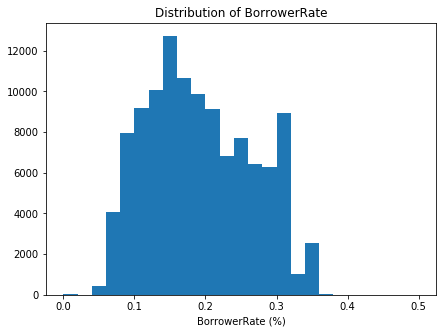

In [7]:
# plot distributions of numerical variable
# distributions of borrowers rate.
binsize = 0.02
bins = np.arange(0, prosper_loan['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = prosper_loan, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate (%)')
plt.title('Distribution of BorrowerRate')
plt.show()

**Observation**

The distribution of the interest rate is slightly skewed to the right with interest of around 0.15% occuring the most for loans in the dataset. interestingly, there is a steep jump in frequency for 0.3% interest rate and slighly higher.

**Question**

What is the distribution of Loan term within the dataset?.

**Visualization**

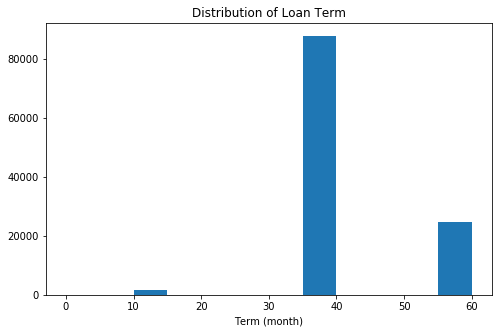

In [8]:
# loan term distribution.
binsize = 5
bins = np.arange(0, prosper_loan['Term'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper_loan, x = 'Term', bins = bins)
plt.xlabel('Term (month)')
plt.title('Distribution of Loan Term')
plt.show()

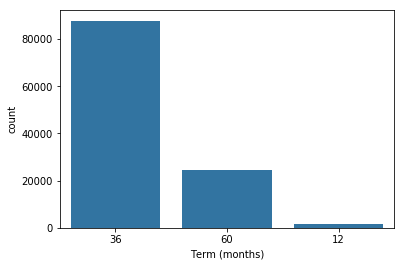

In [9]:
# the gaps in the above histogram shows discontinous data. hence we plot a barchart for the discrete variable.
base_color = sb.color_palette()[0]
term_order = prosper_loan['Term'].value_counts().index
sb.countplot(data=prosper_loan, x='Term', color=base_color, order = term_order);
plt.xlabel('Term (months)');

**Observation**

The gaps between the bins of the histogram suggest that the loan term may be a discrete variable. hence we treat this as categorical and plot a bar chart to visual the distribution of the loan term. 
we see that duration for most of loans in the datasets are above 12 months. loans with 36 months term have the highest frequency.

**Question**

What is the distribution of Loan Amount within the dataset;

**Visualization**

Text(0.5,1,'Distribution of Loan Amount')

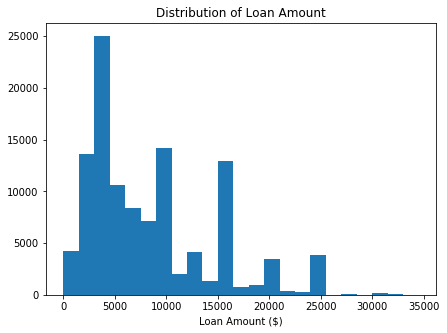

In [10]:
# standard scaled plot distribution of loan amount
binsize = 1500
bins = np.arange(0, prosper_loan['LoanOriginalAmount'].max(), binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = prosper_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.title('Distribution of Loan Amount')

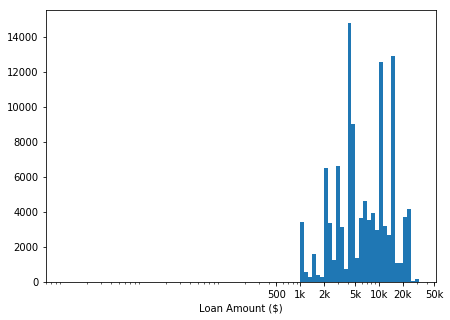

In [11]:
# the above loan amount distribution is greatly skewed to the right, so we apply a log scale transform instead.
binsize = 0.05
bins = 10 ** np.arange(0, np.log10(prosper_loan['LoanOriginalAmount'].max()), binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = prosper_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k'])
plt.show()

**Observation**

The loan original amount has a long-tailed distribution with majority of the loan amounts below 5000 and a few of the loan amount above 25000. a log tranformation of the axes shows spikes in frequency of loans for amount at 1k, 2k, 4.5k, 10k and 15k.

**Question**

what are the frequencies of the loan predictor variables; prosper ratings and prosper scores?.

**Visualization**

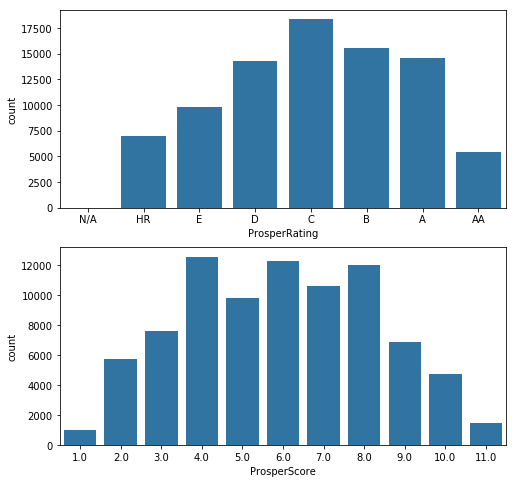

In [12]:
# plot of the distribution of the ordinal variable (prosper rating) and discrete variable (ProsperScore)
fig, ax = plt.subplots(nrows=2, figsize=(8,8))
sb.countplot(data=prosper_loan, x='ProsperRating', color=base_color, ax=ax[0]);
sb.countplot(data=prosper_loan, x='ProsperScore', color= base_color, ax=ax[1]);

**Observation**

As dipicted in the above chart majority of the loan receiptients in the dataset have above average prosper ratings of D. Most of the receptient have a prosper rating of C. Also, most of the loans have a ProsperScore between 4.0 and 8.0. only a small number of loan have prosper score 1.0 and are considered high risk.

**Question**

What is the distribution of Credit score in the dataset?.

**Visualization**

Text(0.5,1,'Distribution of CreditScoreRange')

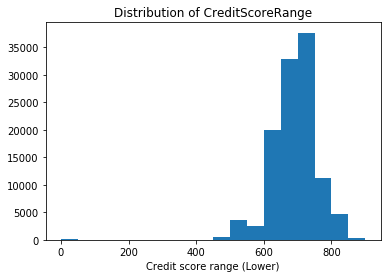

In [13]:
# standard scaled plot distribution of lower bound of Credit score range
binsize = 50
bins = np.arange(0, prosper_loan['CreditScoreRangeLower'].max()+binsize, binsize)
prosper_loan['CreditScoreRangeLower'].hist(bins=bins, grid=False);
plt.xlabel('Credit score range (Lower)')
plt.title('Distribution of CreditScoreRange')

**Observation**

The chart for credit score show an interesting pattern where most of the distribution are set to the far right of the axes. therefore indicating outlier values less than 450. the right limit also point to the fact that higher than normal credit score may be contained in the dataset. we will explore these outliers futher and remove them from the dataset where necessary.

In [14]:
# selecting outliers based on observation from the above distributions.
outliers = (prosper_loan['CreditScoreRangeLower'] < 450) | (prosper_loan['CreditScoreRangeLower'] > 950)
print(outliers.sum())
print(prosper_loan[outliers].sample(10))

175
           ListingCreationDate  Term  LoanStatus  BorrowerRate ProsperRating  \
19737  2006-09-20 13:38:28.487    36   Completed          0.29           NaN   
61785  2007-01-06 13:45:50.243    36   Completed          0.18           NaN   
98718  2006-11-19 21:06:28.090    36   Defaulted          0.29           NaN   
76678  2006-10-03 15:43:47.603    36   Defaulted          0.23           NaN   
9048   2006-12-12 14:37:31.763    36   Defaulted          0.29           NaN   
33122  2006-11-07 09:38:37.350    36  Chargedoff          0.28           NaN   
73152  2006-08-31 18:21:23.823    36   Defaulted          0.28           NaN   
99826  2007-01-11 15:09:52.103    36   Completed          0.15           NaN   
49490  2006-11-03 09:30:13.513    36   Completed          0.25           NaN   
105032 2006-07-25 02:21:31.797    36   Defaulted          0.29           NaN   

        ProsperScore ListingCategory EmploymentStatus  \
19737            NaN               0    Not available   
6

There are 175 loans with unusually low values for the credit score. subsetting the dataset for these loans shows CreditScoreRangeLower contains 132 zero values and 42 loan below with score below 450. it also shows missing value for prosper rating, prosper score, employment status duration and 0 values for listing category and recommendations and has loan origination date prior to july 2009 which is the period for which ProsperScore wasn't unavailable. this might also have been data entry error. we will proceed to remove loans with listing creation date prior to july 2009.

In [15]:
# removing outliers from the dataset
prosper_loan = prosper_loan[prosper_loan.ListingCreationDate >= '2009-08-01']

Text(0.5,1,'Modified Distribution of CreditScoreRange')

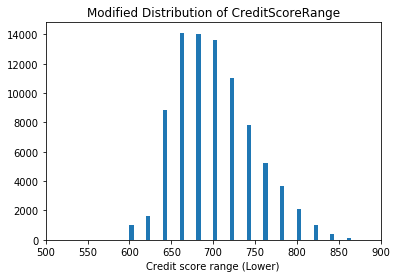

In [16]:
# re-plot the distribution of the lower bound of credit score

binsize = 5
bins = np.arange(0, prosper_loan['CreditScoreRangeLower'].max()+binsize, binsize)
plt.hist(data=prosper_loan, x='CreditScoreRangeLower', bins=bins);
plt.xlim(500, 900)
#plt.xscale('log')
plt.xlabel('Credit score range (Lower)');
plt.title('Modified Distribution of CreditScoreRange')

replotting the distribution after removal of the outlier shows the credit score is unimodal and slightly skewed to the right with most of the borrowers having a credit score of between 670 and 700. only few borrowers in the dataset have a high credit score of 800 and above. since the distribution now covers a smaller range of values there was no need applying transformation to the axis.

before concluding this section. let beriefly explore the other categorical variables; LoanStatus, EmploymentStatus, ListingCategory, IncomeRange.

**Question**

What is the distribution of the nominal categorical variables; EmploymentStatus, ListingCategory and IncomeRange?.

**Visualization**

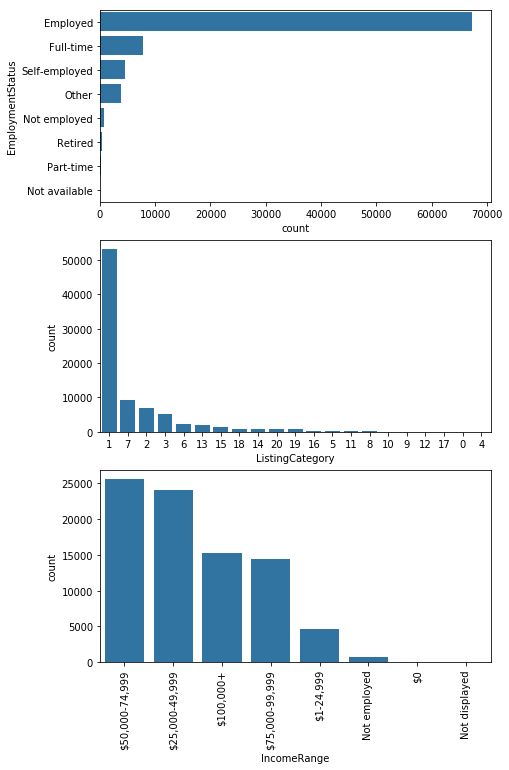

In [17]:
#plot distribution of the nominal categorical variables;
def plot_bar(cat, subplot_no, direction='x'):
    cat_order = prosper_loan[cat].value_counts().index
    if direction == 'x':
        sb.countplot(data=prosper_loan, x=cat, order=cat_order, color=base_color, ax=subplot_no)
        plt.xticks(rotation=90)
    else:
        sb.countplot(data=prosper_loan, y=cat, order=cat_order, color=base_color, ax=subplot_no)
fig, ax = plt.subplots(nrows=3,figsize=(7,12))
plot_bar('EmploymentStatus', ax[0], direction='y')
plot_bar('ListingCategory', ax[1])
plot_bar('IncomeRange', ax[2])

**Observation**

From the visualization of the three nominal categorical variables; employement status, listing category, and income range, we see that most of the borrowers in the loan datasets are employed. also majority of the loan taken was for the purpose of dept consolidation. lastly, people with income range of $50k-$75k took the most loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the borrowers/ interest rate is slightly skewed to the right with most of the loans having an interest rate of around 0.15%. interestingly, there is a steep jump in frequency for loans with 0.3% interest rate and slighly higher. No axes transformation was applied since the distribution of the interest rate covers only a small range of values in the dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Exploring the credit score show an interesting pattern where most of the distribution are set to the far right of the axes with outlier values less than 450 credit score. further exploration of these points shows CreditScoreRangeLower contains 132 zero values and 42 loans with score below 450. it also shows missing value for prosper rating, prosper score, employment status duration and 0 values for listing category and recommendations for these data points. all of the outliers have loan origination date prior to july 2009 which is period for which ProsperScore wasn't yet available. this might also have been data entry error. for consistency in analysis I removed loans with listing creation date prior to july 2009..

## Bivariate Exploration

In this section, we investigate relationships between pairs of variables in our loan
data.

In [18]:
# list of variables and data types for exploration.
numeric_vars = ['Term', 'BorrowerRate', 'LoanOriginalAmount', 'ProsperScore', 'CreditScoreRangeLower']
catigorical_vars = ['ProsperRating', 'ListingCategory', 'EmploymentStatus', 'IncomeRange']

**Question**

How strong is the relationship between pairs of numeric variables?.

**Visualization**

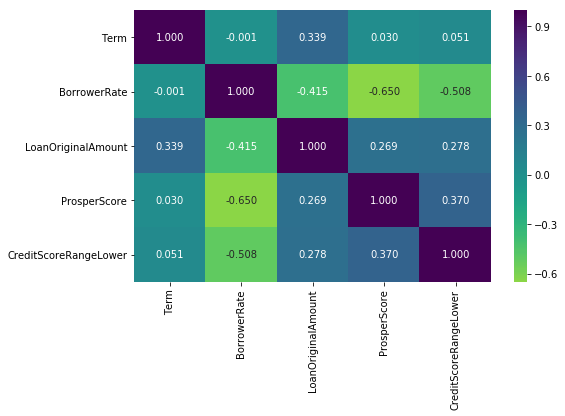

In [19]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(prosper_loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.show()

In [20]:
# generate data sample from dataset to avoid over plotting
prosper_loan_samp = prosper_loan.sample(n=450, replace= False)
print("Shape of original dataset; ", prosper_loan.shape)
print('Shape of sampled data;', prosper_loan_samp.shape)

Shape of original dataset;  (84672, 16)
Shape of sampled data; (450, 16)


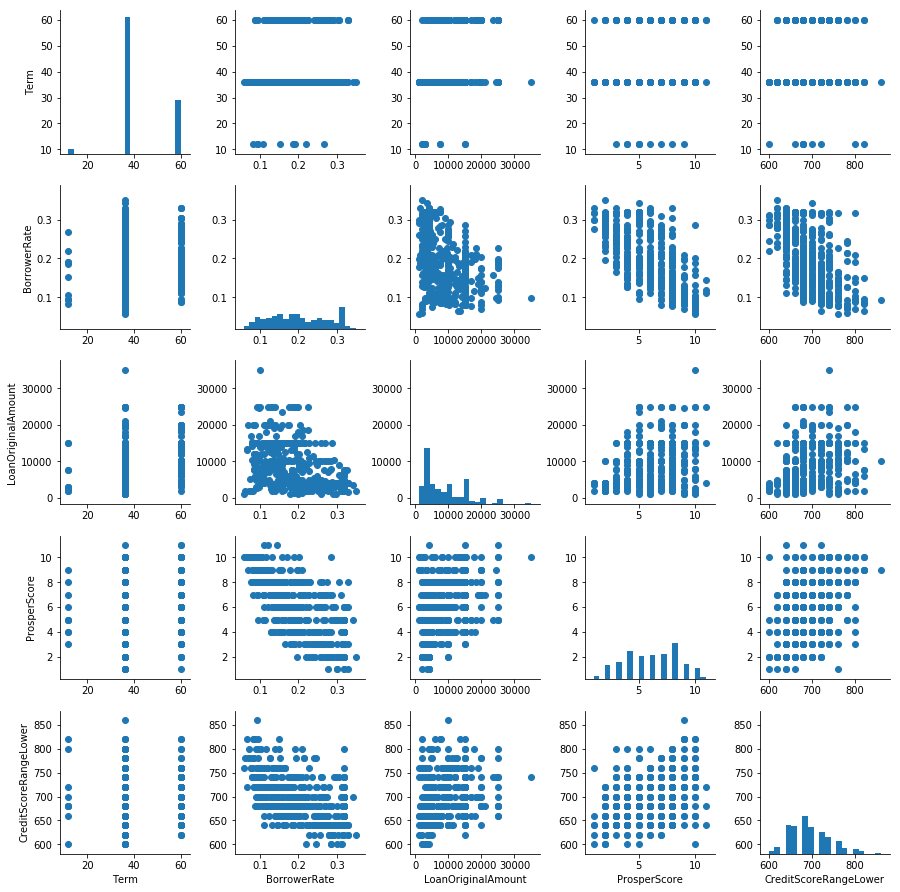

In [21]:
# plot matrix to dipict pair-wise relationships
g = sb.PairGrid(data=prosper_loan_samp, vars = numeric_vars)
g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)

**Observation**

The borrowers interest rate shows a strong negative relationship with ProsperScore and CreditScoreRangeLower variables as expected (since they indicate risk). Interest rate also has a negative correlation to LoanOriginalAmount albert not so strong since the LoanOriginalAmount is distributed over large intervals.

There is also a moderate positive correlation between ProsperScore and CreditScoreRangeLower. the loan term does not have a strong correlation with any of the other numeric variables as such I won't be performing any further exploration/investigation on this variable.

Next, we will explore the relationship between borrowers rate and ProsperScore with the categorical variables.

**Question**

How does the categorical variables interact with the BorrowerRate and ProsperScore

**Visualization**

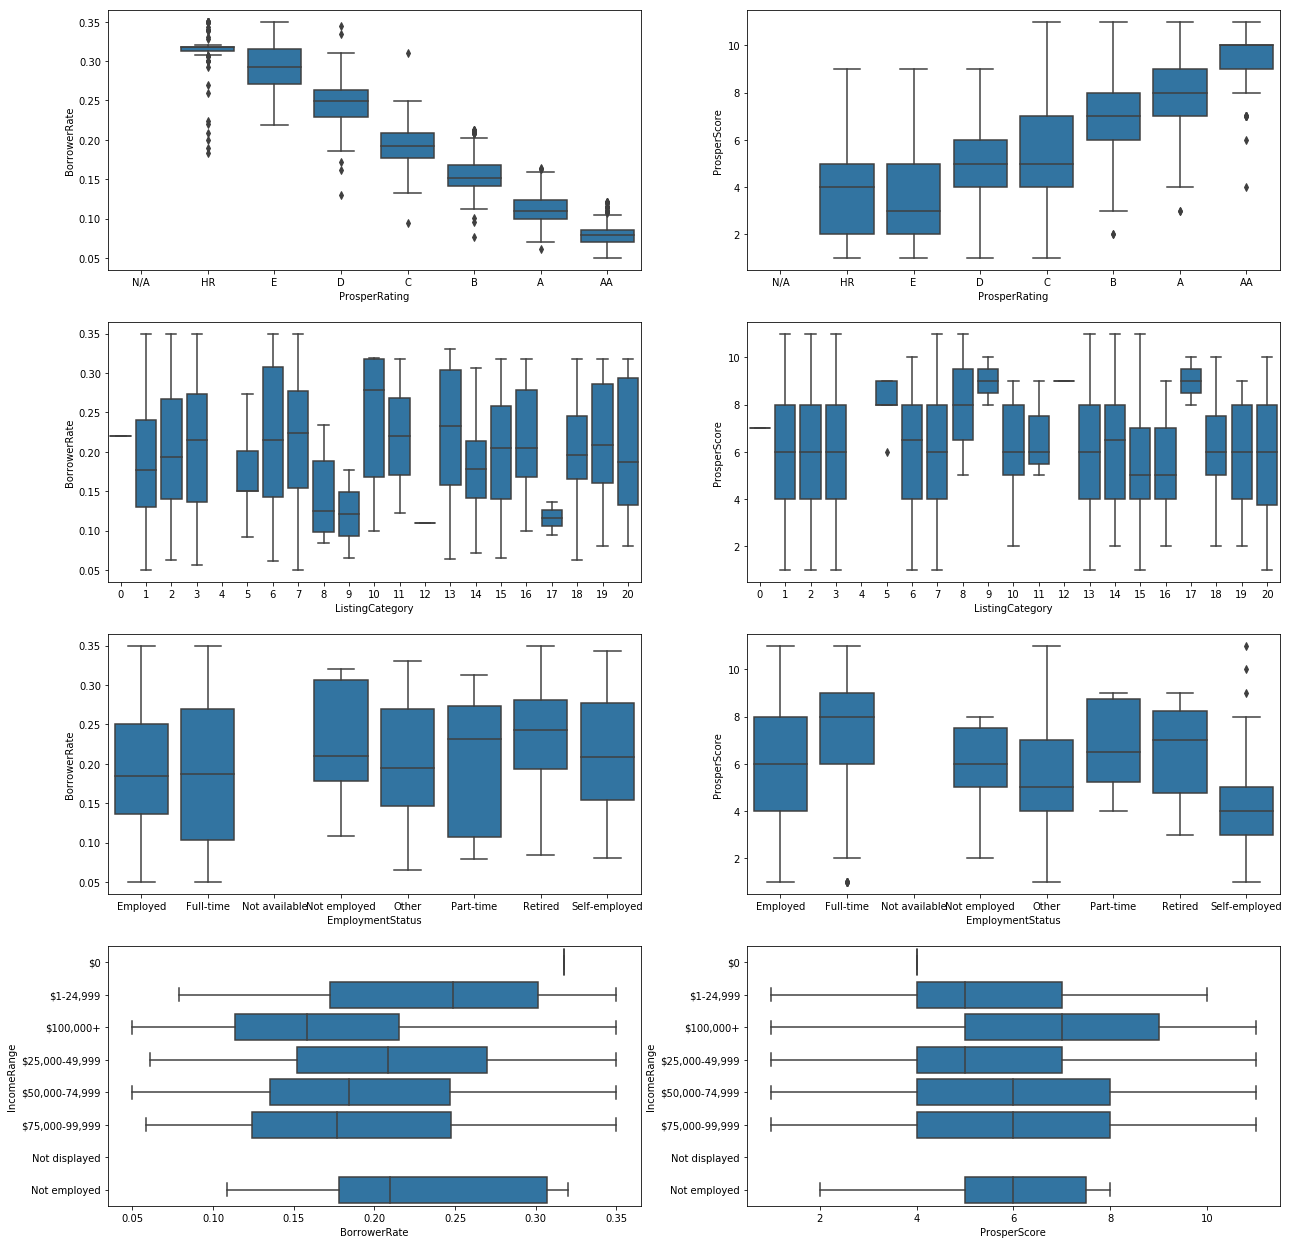

In [22]:
# generate sample of dataset to avoid overploting
prosper_loan_samp1 = prosper_loan.sample(n=2500, replace = False)

fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [21,22])

num_var=['BorrowerRate', 'ProsperScore']

# iterate and plot boxplot for pair-wise relationship between Borrowers rate, ProsperScore and the categorical variables
for i in range(len(num_var)):
    for j in range(len(catigorical_vars)):
        var = catigorical_vars[j]
        if j != len(catigorical_vars) - 1:
            sb.boxplot(data = prosper_loan_samp1, x = var, y = num_var[i], ax = ax[j,i],
                   color = base_color)
        else:
            sb.boxplot(data = prosper_loan_samp1, x =num_var[i] , y = var, ax = ax[j,i],
                   color = base_color)
   

**Observation**

Given the number of variables to be plotted, a plot matrix is not suitable as this generate clustered visuals and ticks labels making it difficult to derive insight. to solve the problem, I iterated and plotted boxplot of all categorical variable for each numeric variable of interest.

As seen from the box plots above, the categorical variable ProsperRating has a strong negative relationship with BorrowersRate and a strong positive correlation with ProsperScore. there is a steady decline in BorrowersRate for increased ProsperRating.

Interestingly, Loan collected for student use (ListingCategory 5) has one of the highest median BorrowerRate for all loan categories despite having the highest median ProsperScore. this is absurd since we have establish a strong negative relationship between BorrowersRate and ProsperScore.

Also, out of job individuals recorded the hightest median BorrowersRate across all available employment statuses. They have the least median ProsperScore alongside self employed individuals and people with no specified employement status.

finally, individuals with earnings above $50k receive the least median BorrowersRate for all income ranges. ProsperScore for these individuals increased with increasing incomeRange.

**Question**

Are there any form of interaction between the categorical variables?.

**Visualization**

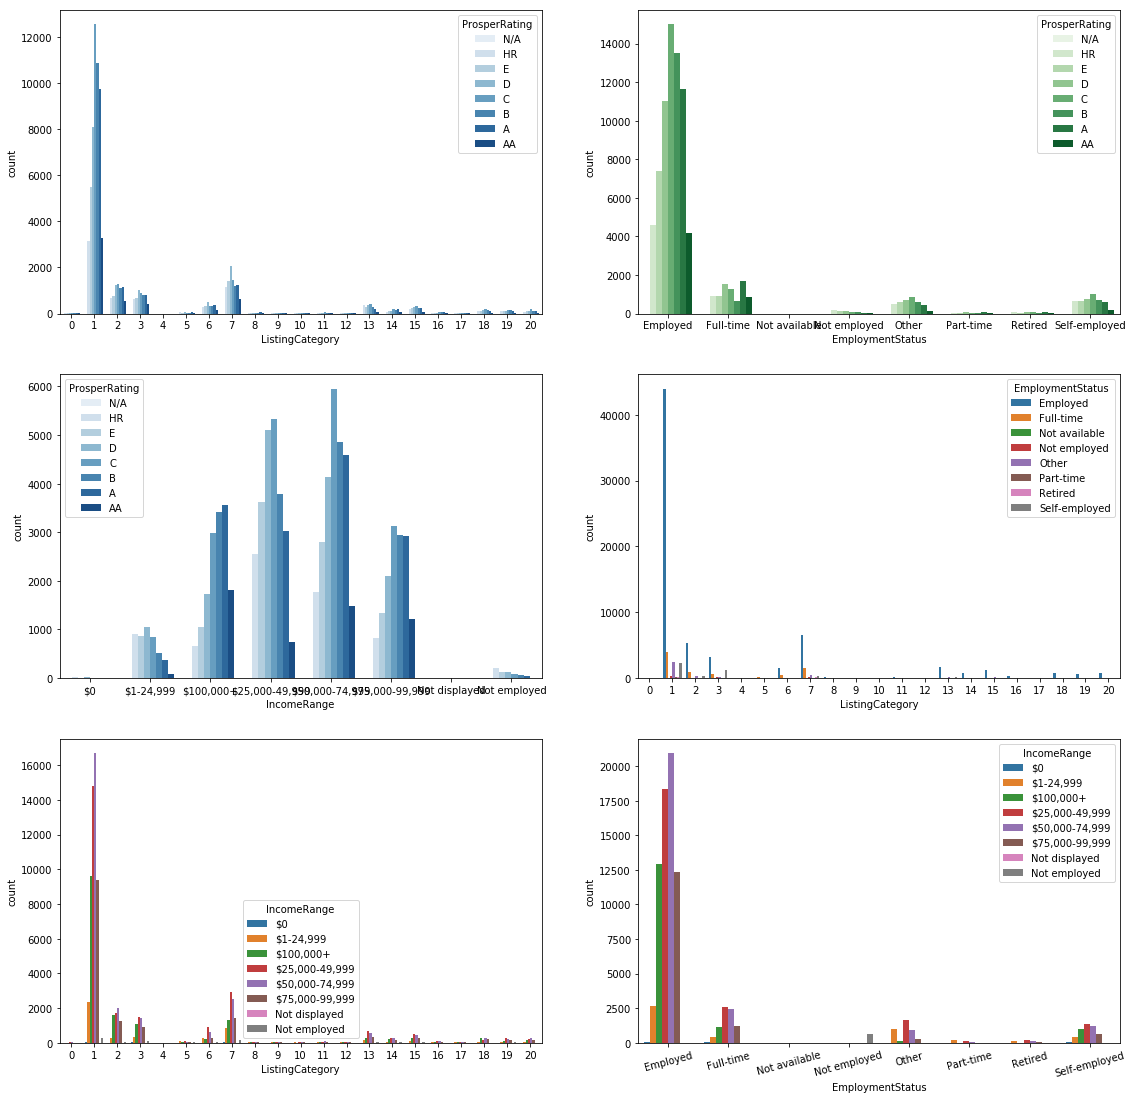

In [23]:
# countplot for pair-wise relation of the categorical features; ProsperRating, ListingCategory, EmploymentStatus, IncomeRange
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = [19, 19])

# subplot 1: ProsperRating vs ListingCategory
sb.countplot(data = prosper_loan, x = 'ListingCategory', hue = 'ProsperRating', palette = 'Blues', ax=ax[0, 0])

# subplot 2: ProsperRating vs. EmploymentStatus
sb.countplot(data = prosper_loan, x = 'EmploymentStatus', hue = 'ProsperRating', palette = 'Greens', ax=ax[0,1])

# # subplot 3: ProsperRating vs. IncomeRange
sb.countplot(data = prosper_loan, x = 'IncomeRange', hue = 'ProsperRating', palette = 'Blues', ax=ax[1,0])
plt.xticks(rotation=15)

# subplot 4: ListingCategory vs. EmploymentStatus
sb.countplot(data = prosper_loan, x = 'ListingCategory', hue = 'EmploymentStatus', ax=ax[1,1])

 # subplot 5: ListingCategory vs. IncomeRange
sb.countplot(data = prosper_loan, x = 'ListingCategory', hue = 'IncomeRange', ax=ax[2,0])

 # subplot 6: EmploymentStatus vs. IncomeRange
sb.countplot(data = prosper_loan, x = 'EmploymentStatus', hue = 'IncomeRange', ax=ax[2,1])

plt.show()

**Observation**

From the plots above we see that most loans are taken predominately for dept consolidation (category 1) and there are more borrowers with prospers rating of D,C,B across all categories with majority of the borrowers having employed or full-time employment status.

Most individuals with IncomeRange of 1-25k have very poor ProsperRating of HR,E,D. Conversely, Most borrowers with income above $50k have top ratings of C,B,A.

To end this section of bivariate visualization, lets take another look at the relationship between BorrowersRate and ProsperScore for the sampled dataset.

Text(0.5,1,'BorrowerRate vs ProsperScore')

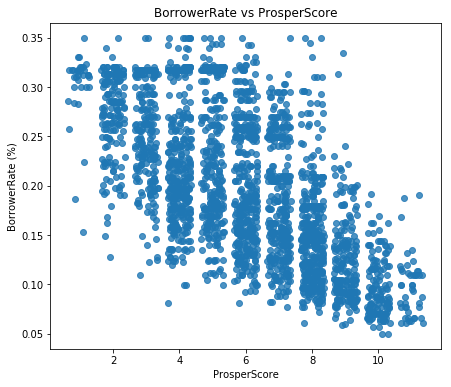

In [24]:
# scatter plot for borrowerRate vs ProsperScore
plt.figure(figsize=[7, 6])
sb.regplot(data=prosper_loan_samp1, x='ProsperScore', y='BorrowerRate', x_jitter=0.35, fit_reg=False)
plt.ylabel('BorrowerRate (%)');
plt.title('BorrowerRate vs ProsperScore')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The BorrowerRate (interest rate) shows a strong negative relationship with ProsperScore and CreditScoreRangeLower variables as expected since they indicate risk (the higher the ProsperScore (lower risk) the lower the interest rate). Interest rate also has a negative correlation to LoanOriginalAmount albert not so strong.

>Also BorrowerRate is related to the categorical variables. there is a steady decline in BorrowersRate for increased ProsperRating. Loan collected for student use (ListingCategory 5) has the highest median rate for all loan categories.
Out of job individuals recorded the hightest median BorrowersRate across all employment statuses this make sense since they have the least median ProsperScore alongside self employed individuals and people with no specified employement status.

>finally, individual with earnings above $50k receive the least median BorrowersRate. ProsperScore for these individuals increased with increasing incomeRange.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Positive correlation was found between ProsperScore and both ProsperRating and CreditScoreRange. The ProsperScore increased for increasing ProsperRating. We also saw that individual with higher IncomeRange had better ProsperRating and are mostly employed.

## Multivariate Exploration

In this section, I will be exploring the interaction of the categorical variables; ProsperRating, ListingCategory, EmploymentStatus, IncomeRange with the relationship between the BorrowerRate and ProsperScore.

**Question**

How does ProsperRating influence the relationship between BorrowerRate and ProsperScore?.

**Visualization**

In [25]:
def plot_scatter(data, char_var, marker_list):
    """Plot scatter plot with shape encoding for a third variable"""
    for cat, marker in marker_list: 
        category = data.loc[data[char_var]==cat]
        sb.regplot(data=category, x='ProsperScore', y='BorrowerRate', marker=marker, x_jitter=0.3, fit_reg=False)
       

Text(0.5,1,'BorrowerRate vs ProsperScore for levels of ProsperRatings')

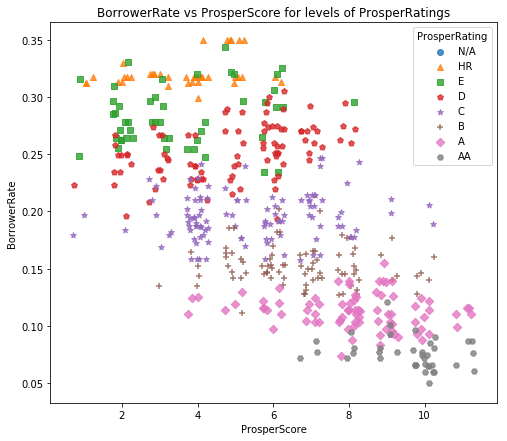

In [26]:
#subplot1: scatter plot of BorrowerRate vs ProsperScore for levels of ProsperRating variable
# specify makers for encoding
plt.figure(figsize=[8,7])
L_samp = prosper_loan.sample(n=500, replace=False)
cat_maker = [['N/A', 'o'], ['HR', '^'], ['E', 's'], ['D', 'p'], ['C', '*'], ['B', '+'], ['A', 'D'], ['AA', 'H']]
plot_scatter(L_samp, 'ProsperRating', cat_maker)
plt.legend(['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], title='ProsperRating')
plt.title("BorrowerRate vs ProsperScore for levels of ProsperRatings")

**Observation**

We see a clear interaction of the ProsperRating with the relationship between BorrowerRate and ProsperScore. For a given ProsperScore the BorrowerRate (interest rate) declines with increasing Prosper rating. from the plot, higher ratings of A, AA have very low interest rate of about 10%

**Question**

How does EmploymentStatus influence the relationship between BorrowerRate and ProsperScore?.

**Visualization**

Text(0.5,1,'BorrowRate vs ProsperScore for levels of EmploymentStatus')

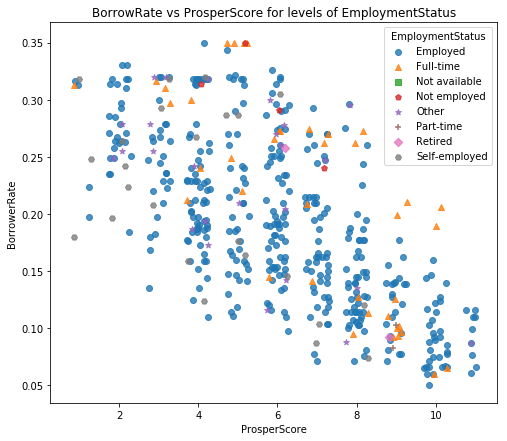

In [27]:
# scatter plot of BorrowerRate vs ProsperScore for levels of EmploymentStatus variable
plt.figure(figsize=[8,7])
emp_marker = [['Employed', 'o'], ['Full-time', '^'], ['Not available', 's'], ['Not employed', 'p'], ['Other', '*'], \
              ['Part-time', '+'], ['Retired', 'D'], ['Self-employed', 'H']]
plot_scatter(L_samp, 'EmploymentStatus', emp_marker)
plt.legend(['Employed', 'Full-time', 'Not available', 'Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed'], \
           title='EmploymentStatus')
plt.title('BorrowRate vs ProsperScore for levels of EmploymentStatus')

**Observatiion**

There is no clear interaction between the EmploymentStatus categorical variable and the negative relationship between the BorrowerRate and ProsperScore numeric variable. this maybe due to the fact the EmploymentStatus is of nominal type.

We will further explore the interaction of the EmploymentStatus and other nonimal categories in our dataset with the BorrowerRate and ProsperScore using heatmaps.

**Question**

How does ListingCategory, and EmploymentStatus categorical variables influence the relationship between BorrowerRate and ProsperScore?.

**Visualization**

In [28]:
def plot_hist2d(x, y, **kwargs):
    """Plot of heatmap for numerical variables with color encodings for categorical variables"""
    palette = kwargs.pop('color')
    bin_edges_x = np.arange(0, x.max()+1.0, 1.0)
    bin_edges_y = np.arange(0, y.max()+0.05, 0.05)
    plt.hist2d(x, y, bins=[bin_edges_x, bin_edges_y], cmin=0.03, cmap=palette)

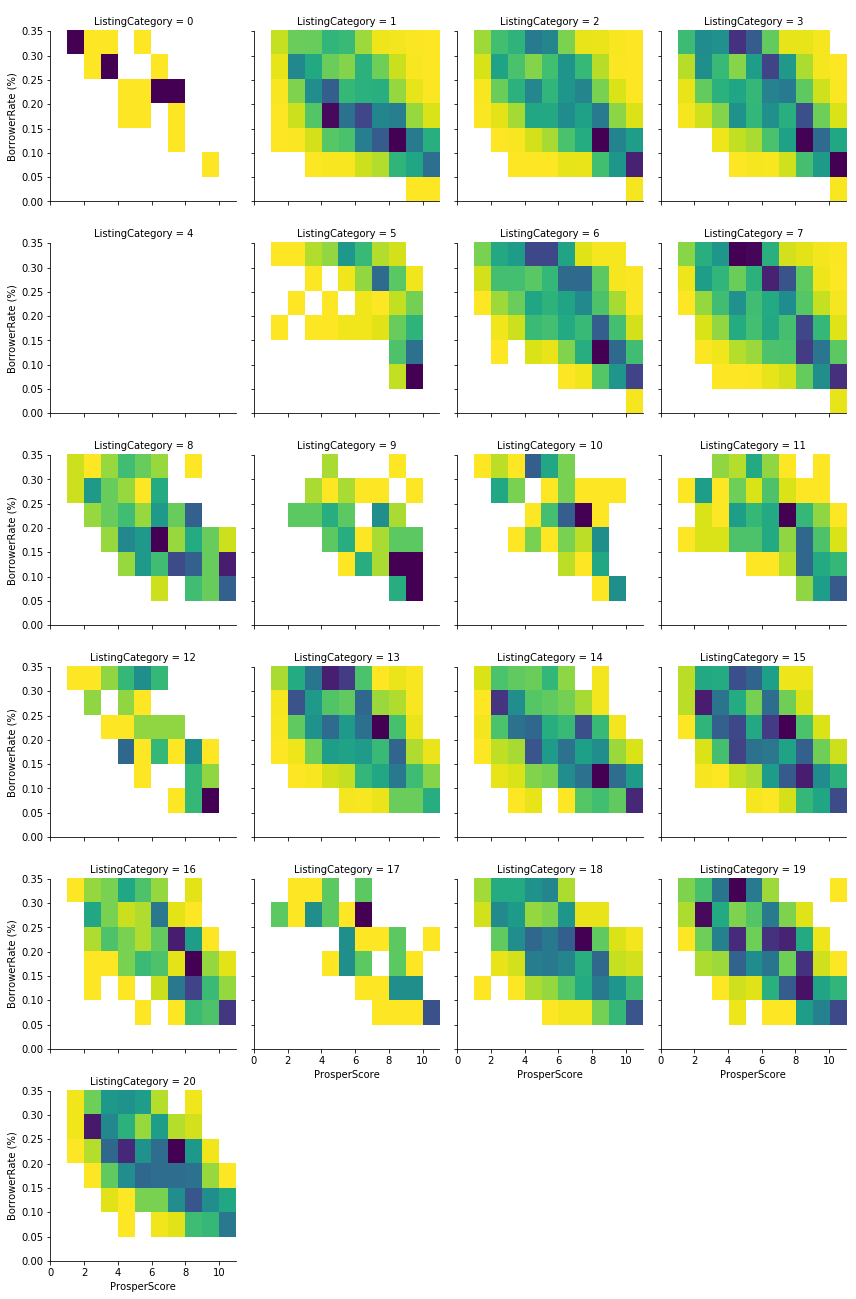

In [29]:
# plot of heatmap for level of ListingCategory variable
g = sb.FacetGrid(data=prosper_loan, col='ListingCategory', col_wrap=4, xlim=[0.9, 11]);
g.map(plot_hist2d, 'ProsperScore', 'BorrowerRate', color='viridis_r');
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerRate (%)')


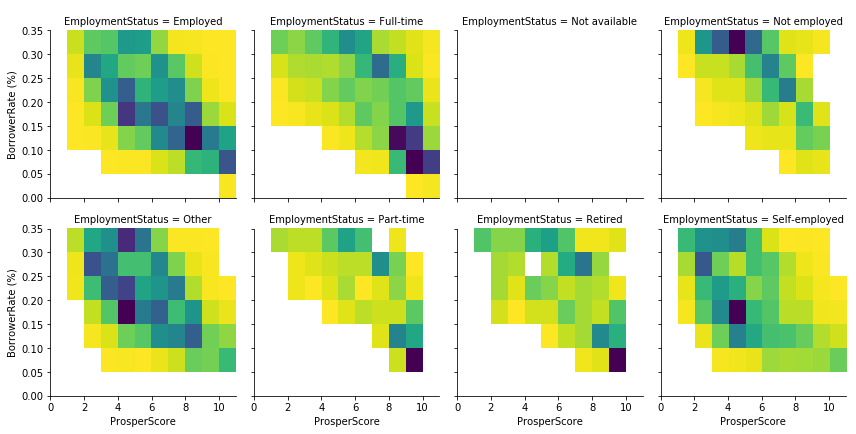

In [30]:
# plot heatmap for level of EmploymentStatus variable
g = sb.FacetGrid(data=prosper_loan, col='EmploymentStatus', col_wrap=4, xlim=[0.9, 11]);
g.map(plot_hist2d, 'ProsperScore', 'BorrowerRate', color='viridis_r');
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerRate (%)')

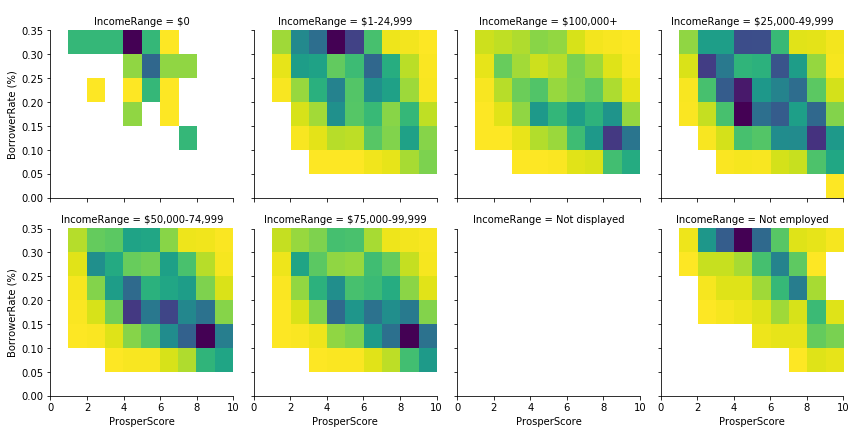

In [31]:
# plot heatmap for level of IncomeRange variable
g = sb.FacetGrid(data=prosper_loan, col='IncomeRange', col_wrap=4, xlim=[0.9, 11]);
g.map(plot_hist2d, 'ProsperScore', 'BorrowerRate', color='viridis_r');
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerRate (%)')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>In the multivariate vizualisation section, I further explored the relation between BorrowerRate and ProsperScore and how They are affected by the Three categorical variables. interaction between ProsperRating(ordinal catigorical) with the negative relationship between the BorrowerRate is clearly depicted in the scatter plot with markers for encoding of the ProsperRating. We see that for a given ProsperScore the BorrowerRate (interest rate) declines with increasing Prosper rating. from the plot, higher ratings of A, AA have very low interest rate of about 10%. these interactions are not so clear for the other categorical variables. Similar interaction can also be seen in the heatmap for IncomeRange where more individual with IncomeRange above 50K received lower BorrowerRate (indicated by the movement of the dark colors to the bottom left). this is not so clear for the ListingCategory and EmploymentStatus variables.

### Were there any interesting or surprising interactions between features?

>Interestingly, Loan collected for student use (ListingCategory 5) has one of the highest BorrowerRate for all loan categories despite having the highest median ProsperScore. this is absurd since we have establish a strong negative relationship between BorrowersRate and ProsperScore.

## Conclusions
From our exploration of the ProsperLoan dataset, here are a few insights we derived;

The BorrowerRate/interest rate shows a strong negative relationship with ProsperScore and CreditScoreRangeLower variables. this is expected since ProsperScore and CreditScoreRangeLower measures risk/probality of the loan going bad or past the due date. Interest rate also has a negative correlation to LoanOriginalAmount albert not so strong. although this was not explored expensively in this analysis.

In exploring the relationship between our variable of interest (BorrowerRate) and other categorical variable we see a steady decline in BorrowersRate for increased ProsperRating which also has a strong positive correlation with ProsperScore.

Interestingly, Loan collected for student use (ListingCategory 5) has one of the highest median BorrowerRate for all loan categories despite having the highest median ProsperScore. this is absurd since we have establish a strong negative relationship between BorrowersRate and ProsperScore. and may be due to fact they are unsecured loan without tangible assets backing (collaterals).

individual with earnings above 50k receive the least BorrowersRate for all income ranges (evident by the movement of the dark color to lower left in the heatmap for IncomeRange upward of $50k).

finally, out of job individuals recorded the hightest median BorrowersRate across all available employment statuses. They have the least median ProsperScore alongside self employed individuals and people with no specified employement status.

**It is important to note that these insights are tentative and not exhaustive since we only explored a few of the features available in the dataset. Also we didn't consider loan data prior to july 2009 in our analysis.**

